In [1]:
import app.consts as c
from app.abstract import *
from app.compute.logic import *
from app.compute.prediction import *
from app.compute.preprocessing import *
from app.compute.training import *
from app.utils.data import *
from app.utils.show import *

In [2]:
prefix_hypoxia = c.DATA_HYPOXIA_PATH
prefix_regular = c.DATA_REGULAR_PATH

In [3]:
hypoxia = pd.read_excel(os.path.join(c.DATA_PATH_PREFIX, "hypoxia.xlsx"))
regular = pd.read_excel(os.path.join(c.DATA_PATH_PREFIX, "regular.xlsx"))

In [4]:
hypoxia.head()

,folder_id,Диагноз,Газы крови,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,Ph,CO2,Glu,LAC,BE,NaN
1,2,Беременность 40-41 неделя. \nГоловное предлежа...,NaN,NaN,NaN,NaN,NaN,NaN
2,12,I своевременные оперативные роды\nОстрая гипок...,–,-,–,–,–,NaN
3,13,I своевременные оперативные роды\nОстрая гипок...,–,-,–,–,–,NaN
4,22,II своевременные роды.\nРубец на матке после о...,–,-,–,–,–,NaN


In [5]:
regular.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Folder_id,Диагноз,Газы крови,NaN,NaN,NaN,NaN
1,NaN,NaN,Ph,CO2,Glu,LAC,BE
2,155156,I своевременные оперативные роды в чисто ягоди...,–,–,–,–,–
3,150,II своевременные оперативные роды\nРубец на ма...,–,–,–,–,–
4,139,V своевременные роды крупным плодом\nРаннее из...,–,–,–,–,–


In [6]:
path = os.path.join(prefix_hypoxia, "1")
df = get_data(path)
df.head()

,time_sec,bpm,uterus
0,0.000000,208.246927,95.068138
1,0.127029,208.246927,95.068138
2,0.254058,208.246927,95.068138
3,0.381087,208.246927,95.068138
4,0.508116,208.246927,11.875406


In [7]:
data_hypoxia = get_all_data(prefix_hypoxia)
data_regular = get_all_data(prefix_regular)

In [8]:
data_hypoxia

{'50':             time_sec         bpm     uterus
 0           0.000000         NaN  93.424479
 1           0.127029         NaN  93.424479
 2           0.254058         NaN  93.424479
 3           0.381087         NaN  93.424479
 4           0.508116         NaN  93.424479
 ...              ...         ...        ...
 229704  24558.695978  209.059327        NaN
 229705  24558.823007  209.957242        NaN
 229706  24558.950036  209.957242        NaN
 229707  24559.077065  209.957242        NaN
 229708  24559.204094  209.957242        NaN
 
 [229709 rows x 3 columns],
 '32':             time_sec         bpm     uterus
 0           0.000000         NaN  76.608187
 1           0.127029         NaN  76.608187
 2           0.254058         NaN  76.608187
 3           0.381087         NaN  76.608187
 4           0.508116         NaN  76.608187
 ...              ...         ...        ...
 234793  25620.594998  151.336184        NaN
 234794  25620.722027  151.336184        NaN
 234795  2562

In [9]:
df = data_hypoxia["1"]

In [10]:
df.head()

,time_sec,bpm,uterus
0,0.000000,208.246927,95.068138
1,0.127029,208.246927,95.068138
2,0.254058,208.246927,95.068138
3,0.381087,208.246927,95.068138
4,0.508116,208.246927,11.875406


In [11]:
# from show.py
def construct(ts, fhr_raw, toco_raw):
    fhr_clean, quality = clean_signal(fhr_raw, ts)
    toco_clean = clean_toco(toco_raw, ts)

    global_baseline, mask = compute_global_baseline(
        fhr_clean, ts, min_event_dur_s=15, osc_std_window_s=30
    )
    baseline, reliable = compute_baseline_line(
        fhr_clean, mask, ts, global_baseline, 200, 20
    )

    stv, ltv = variability_metrics(fhr_clean, ts)

    contractions = extract_contractions(toco_clean, ts)
    events = detect_events(
        fhr_clean,
        ts,
        baseline,
        accel_min_dur_s=5,
        decel_min_dur_s=5,
        accel_thr_bpm=10,
        decel_thr_bpm=10,
    )
    events = classify_decelerations_wrt_toco(events, toco_clean, contractions, ts)

    plot_series(ts, fhr_raw, fhr_clean, baseline)
    plot_toco(ts, toco_raw)
    plot_toco(ts, toco_clean)
    plot_variability(ts, stv, ltv)
    plot_events_on_fhr(ts, fhr_clean, events)
    plot_ctg(
        ts,
        fhr_raw,
        fhr_clean,
        toco_clean,
        baseline,
        events,
        contractions,
        stv,
        ltv,
        quality,
    )
    plot_with_mask(fhr_clean, ~mask, baseline)

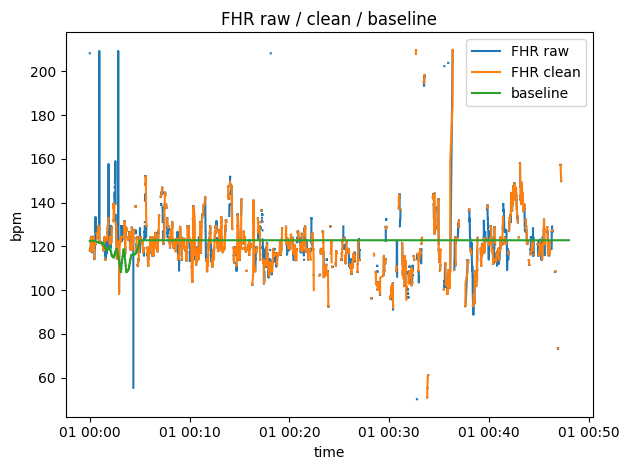

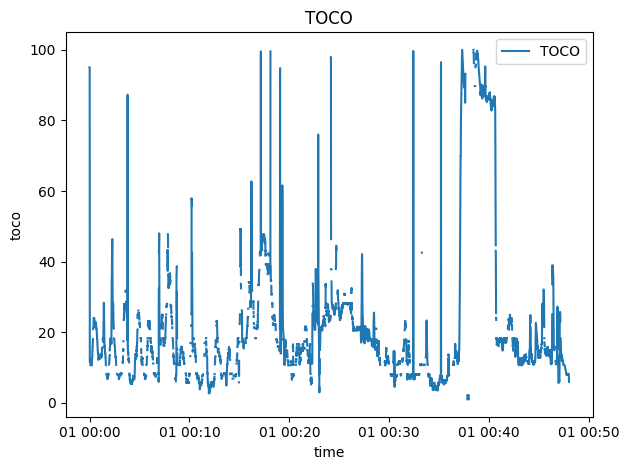

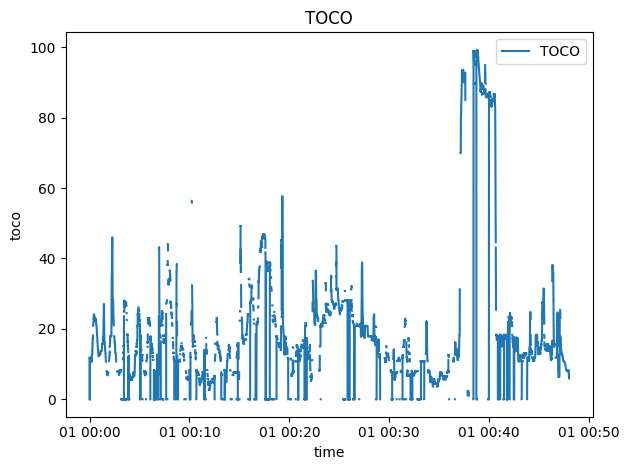

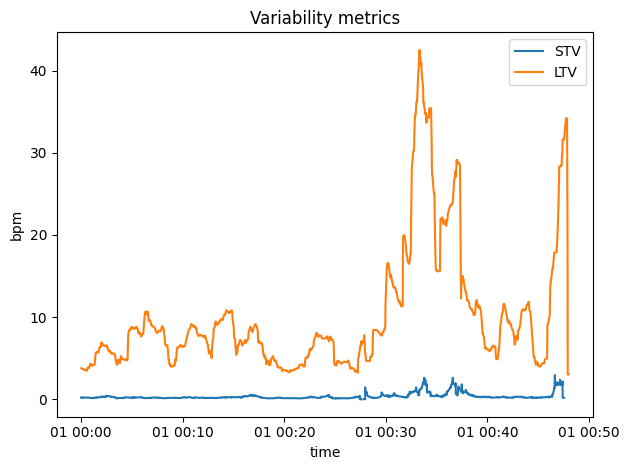

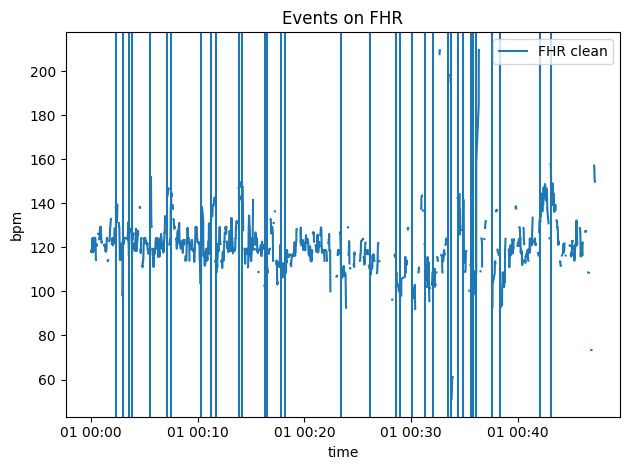

/Users/andrew/nexa/backend/app/utils/show.py:164: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


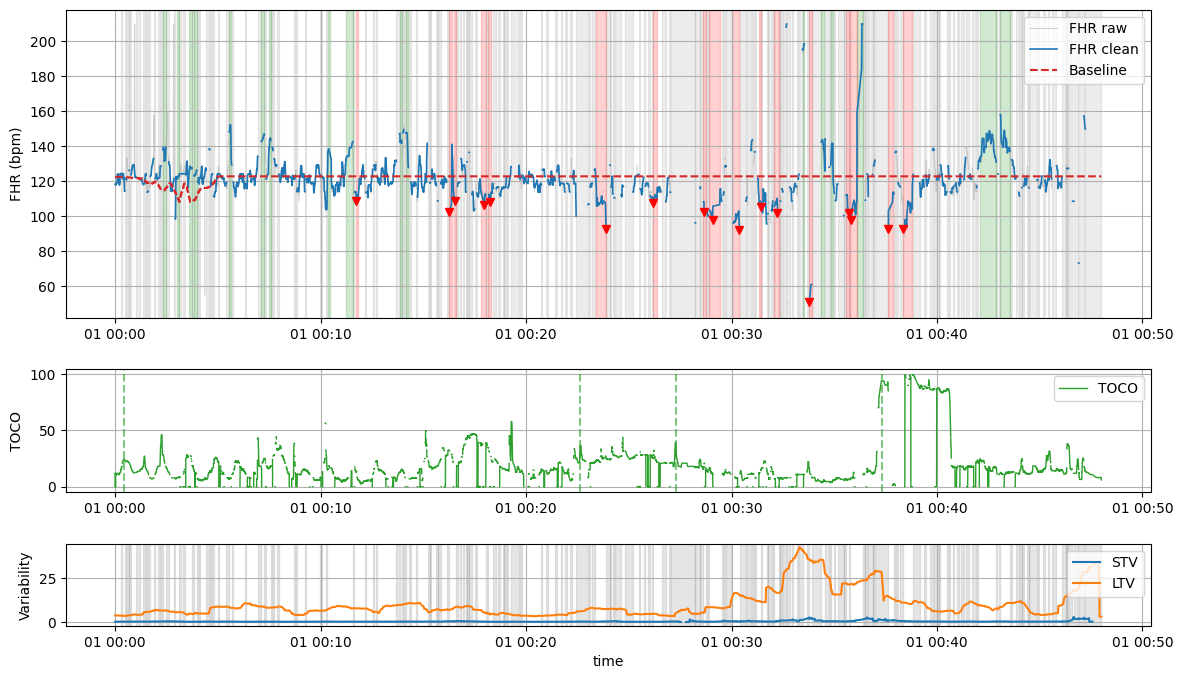

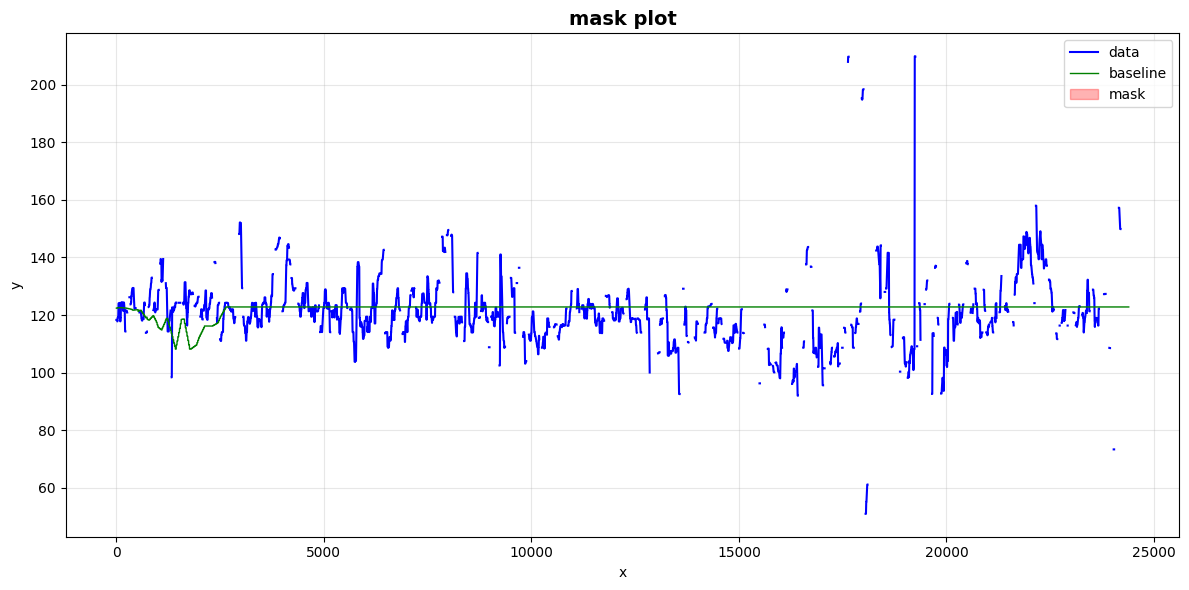

In [12]:
construct(df["time_sec"].to_numpy(), df["bpm"].to_numpy(), df["uterus"].to_numpy())

In [13]:
record = data_hypoxia["1"]
df = build_dataset_from_record(record["time_sec"], record["bpm"], record["uterus"], "1")

In [14]:
df.head()

,patient_id,window_end,y,baseline,fhr_mean,fhr_median,fhr_std,fhr_min,fhr_max,fhr_last,...,max_decel_depth,avg_decel_dur,max_decel_dur,sum_decel_area,recent_decel_fraction,time_since_last_decel_s,toco_mean,toco_std,num_contractions,nan_fraction
0,1,600.0,1,122.389097,124.186565,123.073223,7.068801,98.401924,152.148584,122.431855,...,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,15.238372,8.792679,0,0.243636
1,1,660.0,1,122.389096,123.704274,122.602886,7.507478,98.401924,152.148584,122.645644,...,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,14.903628,9.351554,0,0.230877
2,1,720.0,1,122.266168,123.707322,122.602886,7.874600,98.401924,152.148584,123.329770,...,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,14.276965,9.656871,0,0.193643
3,1,780.0,1,122.389097,123.432257,122.495992,7.621841,103.789417,152.148584,127.483393,...,13.768039,6.986591,6.986591,82.407896,0.011644,1000000.0,13.417647,9.285871,0,0.180581
4,1,840.0,1,120.595938,123.751916,122.431855,8.078827,103.789417,152.148584,141.929449,...,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,13.081370,8.998404,0,0.166359


In [15]:
records = []
for id, record in data_hypoxia.items():
    records.append(
        {
            "patient_id": id,
            "ts": record["time_sec"],
            "fhr": record["bpm"],
            "toco": record["uterus"],
        }
    )
dataset = build_dataset(records, window_size_s=600, step_s=60, horizon_s=600)

/Users/andrew/nexa/backend/app/compute/preprocessing.py:713: RuntimeWarning: All-NaN slice encountered
  right_min = float(np.nanmin(toco[p + 1:right_lim])) if p + 1 < right_lim else float(toco[p])
/Users/andrew/nexa/backend/app/compute/preprocessing.py:712: RuntimeWarning: All-NaN slice encountered
  left_min = float(np.nanmin(toco[left_lim:p])) if p > left_lim else float(toco[p])
/Users/andrew/nexa/backend/app/compute/prediction.py:149: RuntimeWarning: Mean of empty slice
  out['toco_mean'] = float(np.nanmean(toco_w))
/Users/andrew/nexa/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [16]:
dataset.shape

(4878, 30)

In [17]:
dataset["y"].sum() / dataset["y"].count()

np.float64(0.6387863878638786)

In [18]:
dataset.head()

,patient_id,window_end,y,baseline,fhr_mean,fhr_median,fhr_std,fhr_min,fhr_max,fhr_last,...,max_decel_depth,avg_decel_dur,max_decel_dur,sum_decel_area,recent_decel_fraction,time_since_last_decel_s,toco_mean,toco_std,num_contractions,nan_fraction
0,50,600.0,0,146.402570,144.151812,146.448548,14.464235,58.391758,154.640086,147.002141,...,88.010812,32.83698,49.922371,4635.490156,0.109466,296.527876,21.087183,32.298359,0,0.150900
1,50,660.0,0,146.462403,144.378041,146.588151,13.876376,58.391758,154.640086,144.389722,...,88.070645,32.83698,49.922371,4639.419626,0.109489,356.527876,22.358819,31.864933,0,0.149219
2,50,720.0,1,146.462403,144.576140,146.659529,13.667686,58.391758,154.154176,151.498929,...,88.070645,32.83698,49.922371,4639.419626,0.109466,416.527876,23.319825,33.129695,0,0.200042
3,50,780.0,1,146.616762,144.864114,146.830835,13.194540,58.391758,154.154176,146.616702,...,88.225004,32.83698,49.922371,4649.557012,0.109466,476.527876,18.054117,30.361127,0,0.204718
4,50,840.0,1,146.659529,144.955635,146.830835,12.579238,58.391758,154.154176,144.389722,...,88.267771,32.83698,49.922371,4652.365671,0.109512,536.527876,14.818468,27.691356,0,0.200036


In [19]:
pipeline, test_df, eval_res = train_rf_on_dataset(dataset, feature_cols=FEATURE_COLS)
eval_res

{'auc': 0.7045608295100922,
 'ap': 0.7911116728782326,
 'brier': 0.19907441471571907,
 'tp': 356,
 'tn': 63,
 'fp': 146,
 'fn': 33}

In [20]:
record = data_hypoxia["1"]
predict_latest_for_record(pipeline, record["time_sec"], record["bpm"], record["uterus"])

{'proba': 0.635,
 'pred': 1,
 'features': {'baseline': 117.899519,
  'fhr_mean': 125.65393775856197,
  'fhr_median': 122.260823,
  'fhr_std': 13.224374748848112,
  'fhr_min': 73.388562,
  'fhr_max': 157.963656,
  'fhr_last': 149.839658,
  'fhr_slope': 0.027115086139504585,
  'fhr_iqr': 19.262425999999977,
  'stv': 1.768308793103449,
  'ltv': 13.226985939464702,
  'rmssd': 9.99558116490901,
  'amp': 10.766969524038464,
  'freq': 11.287377438142032,
  'num_decel': 2,
  'num_accel': 3,
  'avg_decel_depth': 20.523784499999998,
  'max_decel_depth': 25.14163599999999,
  'avg_decel_dur': 12.00423499999988,
  'max_decel_dur': 12.702894000000015,
  'sum_decel_area': 415.8034487027997,
  'recent_decel_fraction': 0.04001694072886841,
  'time_since_last_decel_s': 578.7438249999996,
  'toco_mean': 32.082643527159156,
  'toco_std': 31.05614558928876,
  'num_contractions': 0,
  'nan_fraction': 0.4556200300881152}}

In [21]:
records_cnn = []
for id, record in data_hypoxia.items():
    ts = record["time_sec"]
    fhr_clean, toco_clean, events = consider_global_events_simple(
        ts, record["bpm"], record["uterus"]
    )
    interpolated = interpolate_signals(ts, fhr=fhr_clean, toco=toco_clean)
    records_cnn.append(
        {
            "patient_id": id,
            "ts": ts,
            "fhr": interpolated["fhr"],
            "toco": interpolated["toco"],
            "events": events,
        }
    )

In [22]:
X, y, groups = build_sequence_dataset(records_cnn, window_size_s=600, horizon_s=600)

In [23]:
y.sum() / y.shape[0]

np.float64(0.6434999042695768)

In [24]:
model, results = train_cnn_on_dataset(X, y, groups, device="cpu", epochs=10)
results

Epoch 1/10 - Train loss: 0.6570, Val loss: 0.6586
Epoch 2/10 - Train loss: 0.6555, Val loss: 0.6591
Epoch 3/10 - Train loss: 0.6543, Val loss: 0.6581
Epoch 4/10 - Train loss: 0.6551, Val loss: 0.6577
Epoch 5/10 - Train loss: 0.6541, Val loss: 0.6582
Epoch 6/10 - Train loss: 0.6526, Val loss: 0.6615
Epoch 7/10 - Train loss: 0.6552, Val loss: 0.6578
Epoch 8/10 - Train loss: 0.6535, Val loss: 0.6576
Epoch 9/10 - Train loss: 0.6537, Val loss: 0.6574
Epoch 10/10 - Train loss: 0.6531, Val loss: 0.6600


/Users/andrew/nexa/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andrew/nexa/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/andrew/nexa/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

{'auc': 0.5176004146151852,
 'ap': 0.6486027555761557,
 'brier': 0.22977026957904528,
 'report': '              precision    recall  f1-score   support\n\n         0.0      0.000     0.000     0.000       227\n         1.0      0.652     1.000     0.789       425\n\n    accuracy                          0.652       652\n   macro avg      0.326     0.500     0.395       652\nweighted avg      0.425     0.652     0.514       652\n'}

In [25]:
record = data_hypoxia["1"]
predict_on_data(model, record["time_sec"], record["bpm"], record["uterus"])

/Users/andrew/nexa/backend/app/compute/prediction_cnn_gru.py:200: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  window_end = float(ts.tail(1))


0.5986850261688232

In [26]:
records = []
for id, record in data_hypoxia.items():
    records.append(
        {
            "patient_id": id,
            "ts": record["time_sec"],
            "fhr": record["bpm"],
            "toco": record["uterus"],
            "label": 1,
        }
    )
for id, record in data_regular.items():
    records.append(
        {
            "patient_id": id,
            "ts": record["time_sec"],
            "fhr": record["bpm"],
            "toco": record["uterus"],
            "label": 0,
        }
    )
dataset, y, groups = build_longterm_dataset(records, window_size_s=1200, step_s=300)

/Users/andrew/nexa/backend/app/compute/preprocessing.py:713: RuntimeWarning: All-NaN slice encountered
  right_min = float(np.nanmin(toco[p + 1:right_lim])) if p + 1 < right_lim else float(toco[p])
/Users/andrew/nexa/backend/app/compute/preprocessing.py:712: RuntimeWarning: All-NaN slice encountered
  left_min = float(np.nanmin(toco[left_lim:p])) if p > left_lim else float(toco[p])
/Users/andrew/nexa/backend/app/compute/prediction.py:149: RuntimeWarning: Mean of empty slice
  out['toco_mean'] = float(np.nanmean(toco_w))
/Users/andrew/nexa/.venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/andrew/nexa/backend/app/compute/preprocessing.py:713: RuntimeWarning: All-NaN slice encountered
  right_min = float(np.nanmin(toco[p + 1:right_lim])) if p + 1 < right_lim else float(toco[p])
/Users/andrew/nexa/backend/app/compute/preprocessing.py:712: RuntimeWar

In [27]:
dataset.shape

(121, 137)

In [28]:
y.sum() / len(y)

np.float64(0.2396694214876033)

In [29]:
dataset.head()

,n_windows,baseline_mean,baseline_std,baseline_min,baseline_max,baseline_trend,fhr_mean_mean,fhr_mean_std,fhr_mean_min,fhr_mean_max,...,toco_std_std,toco_std_min,toco_std_max,toco_std_trend,nan_fraction_mean,nan_fraction_std,nan_fraction_min,nan_fraction_max,nan_fraction_trend,frac_windows_with_decel
0,78,144.634857,4.786928,136.087272,158.152900,0.019191,147.724656,5.665979,138.295480,162.753522,...,4.247813,0.786940,20.234466,-0.051983,0.159654,0.075475,0.044714,0.367521,0.000441,0.423077
1,82,148.525518,4.293319,136.331551,157.536077,-0.005475,144.948213,6.535345,121.716211,154.456003,...,3.493514,2.931439,18.730496,-0.096188,0.192878,0.067686,0.088500,0.361750,0.000339,0.902439
2,68,120.115579,4.804404,111.913415,129.102084,0.105148,121.704820,6.232963,113.417436,139.918420,...,7.637989,0.000000,39.083366,0.179744,0.249462,0.071441,0.075238,0.397185,-0.001042,0.838235
3,84,159.673698,6.224163,149.668626,169.380011,0.211921,160.127656,7.197650,149.520326,180.185810,...,4.223014,3.831765,20.979234,0.052036,0.194094,0.075996,0.075279,0.422766,0.001400,0.928571
4,4,128.473506,2.475376,124.527620,130.862932,-1.055154,132.961385,2.643848,128.609843,135.707857,...,0.661201,18.361272,20.138580,0.580249,0.353065,0.047420,0.271143,0.384594,0.030877,0.500000


In [30]:
pipeline, test_df, eval_res = train_longterm_gbm_on_dataset(dataset, y, groups)
eval_res

[LightGBM] [Info] Number of positive: 23, number of negative: 74
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4104
[LightGBM] [Info] Number of data points in the train set: 97, number of used features: 136
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237113 -> initscore=-1.168571
[LightGBM] [Info] Start training from score -1.168571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Users/andrew/nexa/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


{'auc': 0.8240740740740741,
 'ap': 0.5805555555555555,
 'brier': 0.14850663130228045,
 'tp': 2,
 'tn': 17,
 'fp': 1,
 'fn': 4}

In [31]:
record = data_hypoxia["1"]
predict_longterm_for_record(
    pipeline,
    {
        "patient_id": "1",
        "ts": record["time_sec"],
        "fhr": record["bpm"],
        "toco": record["uterus"],
    },
)

/Users/andrew/nexa/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


{'proba': 0.35065532695606566,
 'pred': 0,
 'features': {'n_windows': 6.0,
  'baseline_mean': 118.15229619122023,
  'baseline_std': 1.828902239566484,
  'baseline_min': 116.146446,
  'baseline_max': 121.68359149999999,
  'baseline_trend': -1.0110248159438673,
  'fhr_mean_mean': 119.43275143755677,
  'fhr_mean_std': 2.2948512448979463,
  'fhr_mean_min': 116.18517771229125,
  'fhr_mean_max': 122.69159832656563,
  'fhr_mean_trend': -0.9027723469239768,
  'fhr_median_mean': 118.73804855555557,
  'fhr_median_std': 2.029576459147184,
  'fhr_median_min': 116.445751,
  'fhr_median_max': 121.99002333333333,
  'fhr_median_trend': -1.1047822476190314,
  'fhr_std_mean': 11.969592750451417,
  'fhr_std_std': 3.9835369811127204,
  'fhr_std_min': 7.964074665512395,
  'fhr_std_max': 18.174005211897473,
  'fhr_std_trend': 2.2206897753238937,
  'fhr_min_mean': 72.77569916666666,
  'fhr_min_std': 21.835714360689547,
  'fhr_min_min': 51.026189,
  'fhr_min_max': 98.401924,
  'fhr_min_trend': -11.51775219999